#### Name: Qiwen Ma

Date: 13/5/2018

Version: 3.0

Environment: Python 3.6.0 and Jupyter notebook

Libraries used:
* pandas (for dataframe, included in Anaconda Python 3.6)
* re
* sklearn.linear_model
* matplotlib.pyplot

## 1.Introduction
This assignment make correction to the columns that contains missing values.

The detail of each section is shown below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dataset3_with_missing.csv",encoding = "utf-8_sig")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9901 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9900 non-null float64
sqft_basement    9900 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.967000e+03,9.967000e+03,9967.000000,9567.00000,9901.000000,9.967000e+03,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9900.000000,9900.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000
mean,4.582619e+09,5.292077e+05,3.360590,2.08430,2075.559135,1.475640e+04,1.480636,0.006522,0.221932,3.447677,7.667804,1788.707071,286.502626,1970.795124,88.537173,98076.508578,47.562232,-122.207991
std,2.874615e+09,3.292537e+05,0.918844,0.68647,875.594047,3.624471e+04,0.525657,0.080496,0.745250,0.670354,1.157612,803.025500,436.856021,29.212704,411.039302,53.255806,0.137256,0.142927
min,1.000102e+06,7.800000e+04,0.000000,0.00000,290.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000
25%,2.124069e+09,3.203000e+05,3.000000,1.75000,1440.000000,5.136500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.475700,-122.324000
50%,3.905040e+09,4.500000e+05,3.000000,2.25000,1950.000000,7.725000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98059.000000,47.574500,-122.221000
75%,7.304301e+09,6.400000e+05,4.000000,2.50000,2550.000000,1.084150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,560.000000,1996.000000,0.000000,98117.000000,47.679200,-122.118000
max,9.895000e+09,7.062500e+06,33.000000,4.50000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [5]:
data.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

From the information above, it shows that in the column bathrooms, sqft_living, sqft_above and sqft_basement here are missing values.
I first use linear regression find out the relationship between the sqft_living, sqft_above and sqft_basement columns.

In [6]:
df = data.copy()

In [7]:
corr = df.corr().style.background_gradient().format("{:.2f}")
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.00,-0.01,0.01,0.02,0.00,-0.13,0.02,0.00,0.02,-0.02,0.02,0.00,0.00,0.02,-0.01,-0.02,-0.00,0.04
price,-0.01,1.00,0.29,0.52,0.69,0.07,0.28,0.25,0.40,0.05,0.68,0.59,0.30,0.05,0.13,-0.06,0.32,0.03
bedrooms,0.01,0.29,1.00,0.51,0.56,0.03,0.19,-0.01,0.07,0.04,0.35,0.45,0.30,0.18,-0.01,-0.17,-0.02,0.14
bathrooms,0.02,0.52,0.51,1.00,0.79,0.09,0.52,0.05,0.17,-0.12,0.68,0.71,0.29,0.51,0.03,-0.24,0.01,0.28
sqft_living,0.00,0.69,0.56,0.79,1.00,0.16,0.40,0.09,0.27,-0.07,0.77,0.87,0.41,0.35,0.04,-0.21,0.05,0.26
sqft_lot,-0.13,0.07,0.03,0.09,0.16,1.00,0.00,0.01,0.04,-0.01,0.11,0.17,0.01,0.06,0.00,-0.14,-0.08,0.22
floors,0.02,0.28,0.19,0.52,0.40,0.00,1.00,0.03,0.02,-0.27,0.48,0.58,-0.26,0.49,0.00,-0.10,0.03,0.18
waterfront,0.00,0.25,-0.01,0.05,0.09,0.01,0.03,1.00,0.38,0.01,0.08,0.06,0.07,-0.02,0.08,0.04,-0.02,-0.05
view,0.02,0.40,0.07,0.17,0.27,0.04,0.02,0.38,1.00,0.05,0.25,0.14,0.28,-0.06,0.09,0.10,-0.01,-0.09
condition,-0.02,0.05,0.04,-0.12,-0.07,-0.01,-0.27,0.01,0.05,1.00,-0.15,-0.18,0.20,-0.39,-0.07,0.03,0.01,-0.14


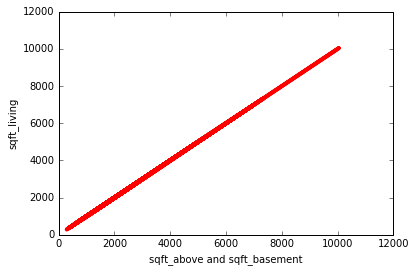

In [8]:
a = df['sqft_above']
b = df['sqft_basement']
X = []
for i in range(len(df)):
    if list(a)[i] is not None and list(b)[i] is not None:
        X.append((list(a)[i] + list(b)[i]))
Y = df['sqft_living']            
plt.plot(X,Y,color='red', linewidth=4)
plt.xlabel("sqft_above and sqft_basement")
plt.ylabel("sqft_living")
plt.show()

From the plot above, I can prove that the sqft_living, sqft_above and sqft_basement are in the linear correlation. The rate increase of sqft_above and sqft_basement is exactly the same as sqft_living.So it can impute the missing values of these three columns by following sqft_living = sqft_above + sqft_basement.

In [9]:
#fill the null values in the sqft_living column with the exact values imputed from sqft_above + sqft_basement
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_above'] + df['sqft_basement'])
#print(df.iloc[188:195])
#fill the null values in the sqft_above column with the exact values imputed from sqft_living - sqft_basement
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_living'] - df['sqft_basement'])
#print(df.iloc[145:155])
#fill the null values in the sqft_basement column with the exact values imputed from sqft_living - sqft_above
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_living'] - df['sqft_above'])
#print(df.iloc[433:438])

In [10]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

This step is to observe that there are some values that are 0 but not null in the bedrooms and bathrooms column

In [11]:
(df[['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]==0).sum()

id                  0
date                0
price               0
bedrooms            3
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       9902
view             9032
condition           0
grade               0
sqft_above          0
sqft_basement    6167
yr_built            0
yr_renovated     9525
zipcode             0
lat                 0
long                0
dtype: int64

In [12]:
df['bathrooms'].replace(0,np.nan,inplace=True)

In [13]:
df['bathrooms'].isnull().sum()

402

In [14]:
# There is one data beteeen sqft_above and sqft_basement need to be considered as the sqft_above is smaller the sqft_basement
#but it is not missing value
for i in (df.sqft_above):
    if df.sqft_above[i] < df.sqft_basement[i]:
        print("inedx of to be detected:",i," the sqft_above is:",df.sqft_above[i],"the sqft_basement is:",df.sqft_basement[i])

inedx of to be detected: 1068.0  the sqft_above is: 1130.0 the sqft_basement is: 1660.0


Then it is needed to deal with the null values in the bathrooms column. Using the correlation table above to find out the relationship between the bathrooms column and the other columns. The columns that are with correlation that lower than 0.5 will be dropped and will not be further considered.

In [15]:
df1 = df.drop(['id','date','sqft_lot','waterfront','view','condition','sqft_basement','yr_renovated','zipcode','lat','long'],axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built
0,313000,3,1.50,1340.0,1.5,7,1340.0,1955
1,2384000,5,2.50,3650.0,2.0,10,3370.0,1921
2,342000,3,2.00,1930.0,1.0,8,1930.0,1966
3,420000,3,2.25,2000.0,1.0,8,1000.0,1963
4,550000,4,2.50,1940.0,1.0,7,1140.0,1976


In [16]:
df1.shape

(9967, 8)

I can then use the features do not have missing to predict the null values in the bathrooms column with the help of machine learning algorithm. The use of linear regression can predict the more accurate values to be placed in to null values position.

In [17]:
lm_impute = LinearRegression()
dataset1_with_null = df1[['price','bedrooms','sqft_living','floors','grade','sqft_above','yr_built','bathrooms']]
#dataset1_with_null.shape
dataset2_no_null = dataset1_with_null.dropna()
#dataset2_no_null.shape
train_X = dataset2_no_null.iloc[:,:7]
train_Y = dataset2_no_null.iloc[:,7]
lm_impute.fit(train_X,train_Y)

test_data = dataset1_with_null.iloc[:,:7]

print("Intercept value:",lm_impute.intercept_)
print("coefficient:", lm_impute.coef_)
print("The coefficient of determination R^2 of the prediction:", lm_impute.score(train_X,train_Y))
df['bathrooms'] = pd.DataFrame(lm_impute.predict(test_data))

Intercept value: -10.339487061
coefficient: [  5.48871342e-08   8.48094697e-02   5.74873038e-04   2.75210951e-01
   3.17377221e-02  -2.24296346e-04   5.41604615e-03]
The coefficient of determination R^2 of the prediction: 0.732457200901


In [18]:
df.iloc[30:35]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
30,472000620,20140502T000000,790000,3,2.199225,2600.0,4750,1.0,0,0,4,9,1700.0,900.0,1951,0,98117,47.6833,-122.400
31,3876200060,20140502T000000,382500,4,1.718383,1560.0,8700,1.0,0,0,4,7,1560.0,0.0,1967,0,98034,47.7274,-122.181
32,2738600140,20140502T000000,499950,4,2.838200,2860.0,3345,2.0,0,0,3,8,2190.0,670.0,2004,0,98072,47.7735,-122.158
33,9294300070,20140502T000000,650000,4,1.883041,1820.0,5000,1.5,0,1,3,7,1640.0,180.0,1945,0,98115,47.6815,-122.269
34,5056500260,20140502T000000,440000,4,2.200446,2160.0,8119,1.0,0,0,3,8,1080.0,1080.0,1966,0,98006,47.5443,-122.177


In [19]:
df['bathrooms'].isnull().sum()

0

Predict the values of bedrooms that are with null values

In [20]:
df['bedrooms'].replace(0,np.nan,inplace=True)

In [21]:
df['bedrooms'].isnull().sum()

3

In [22]:
df2 = df.drop(['id','date','sqft_lot','waterfront','view','condition','sqft_basement','yr_renovated','zipcode','lat','long'],axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built
0,313000,3.0,1.625244,1340.0,1.5,7,1340.0,1955
1,2384000,5.0,2.829843,3650.0,2.0,10,3370.0,1921
2,342000,3.0,1.787385,1930.0,1.0,8,1930.0,1966
3,420000,3.0,2.024255,2000.0,1.0,8,1000.0,1963
4,550000,4.0,2.088977,1940.0,1.0,7,1140.0,1976


In [23]:
lm_impute = LinearRegression()
dataset1_with_null = df2[['price','bathrooms','sqft_living','floors','grade','sqft_above','yr_built','bedrooms']]
#dataset1_with_null.shape
dataset2_no_null = dataset1_with_null.dropna()
#dataset2_no_null.shape
train_X = dataset2_no_null.iloc[:,:7]
train_Y = dataset2_no_null.iloc[:,7]
lm_impute.fit(train_X,train_Y)

test_data = dataset1_with_null.iloc[:,:7]

print("Intercept value:",lm_impute.intercept_)
print("coefficient:", lm_impute.coef_)
print("The coefficient of determination R^2 of the prediction:", lm_impute.score(train_X,train_Y))
df['bedrooms'] = pd.DataFrame(lm_impute.predict(test_data))

Intercept value: 121.914299112
coefficient: [ -6.47181670e-07   1.17911361e+01  -6.77840623e-03  -3.24504977e+00
  -3.74223801e-01   2.64470874e-03  -6.38613372e-02]
The coefficient of determination R^2 of the prediction: 1.0


In [24]:
df[df['bedrooms']==0].sum()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
dtype: float64

In [25]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [32]:
df[df['id']==3980300371]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8991,3980300371,20140926T000000,142000,3,0.71,290.0,20875,1.0,0,0,1,1,290.0,0.0,1963,0,98024,47.5308,-121.888


In [27]:
df['bathrooms']= df['bathrooms'].apply(lambda x:round(x,2))

In [28]:
df['bedrooms']= df['bedrooms'].apply(lambda x:round(float(str(x)[:3])))

In [29]:
df.head(33)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.63,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.83,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,1.79,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.02,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.09,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114
5,5100401414,20140502T000000,490000,2,1.16,880.0,6380,1.0,0,0,3,7,880.0,0.0,1938,1994,98115,47.6924,-122.322
6,7525100520,20140502T000000,335000,2,1.55,1350.0,2560,1.0,0,0,3,8,1350.0,0.0,1976,0,98052,47.6344,-122.107
7,2591720070,20140502T000000,482000,4,2.58,2710.0,35868,2.0,0,0,3,9,2710.0,0.0,1989,0,98038,47.3750,-122.022
8,1323089184,20140502T000000,452500,3,2.23,2430.0,88426,1.0,0,0,4,7,1570.0,860.0,1985,0,98045,47.4828,-121.718
9,6127600110,20140502T000000,640000,4,1.74,1520.0,6200,1.5,0,0,3,7,1520.0,0.0,1945,0,98115,47.6780,-122.269


In [30]:
df_final = df.set_index('id', inplace = False)

In [31]:
df_final.to_csv('dataset3_solution.csv',encoding = "utf-8_sig")  

## Summery

1. Identify the missing values in each column and find out the character of the missing values.
2. The most important thing is to find out the relationship between the the data. Beside using through observation, the linear regression and further correlation methods are useful to identify the relation.
3. Use the relation to assume and compute the missing values.